# Beispiel: Raketengleichung
Bewegungsgleichung einer Rakete: gerader Start mit Gravitation.

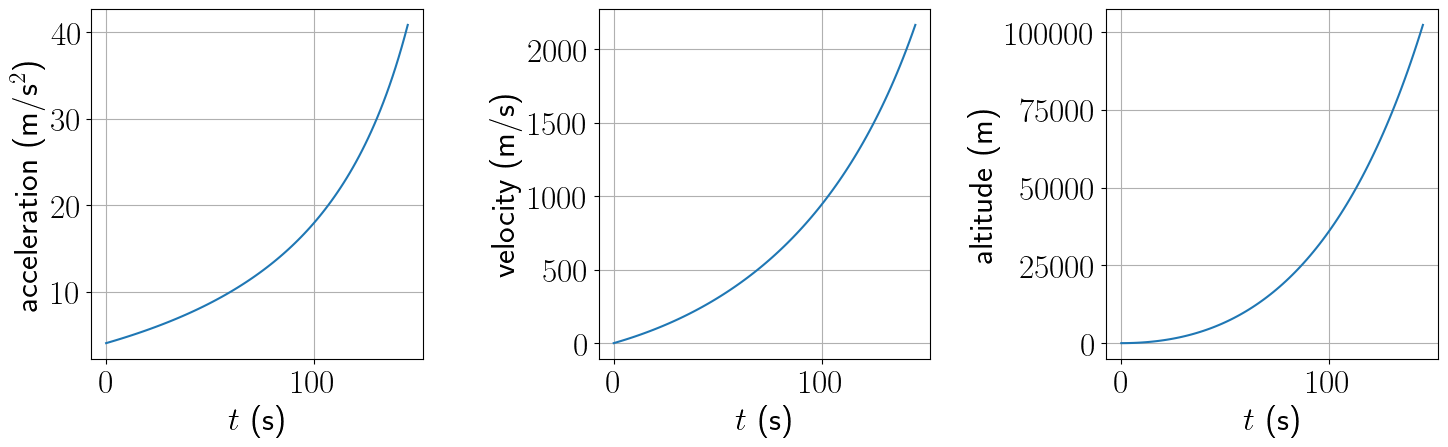

In [1]:
# equation for acceleration of rockets
def acceleration( t, t0, m0, mp, vrel, g ):
    return -( mp * vrel )/( m0 - mp * (t - t0) ) + g

# equation for rocket velocity
def velocity( t, t0, m0, mp, vrel, g ):
    return -vrel * np.log( m0/( m0 - mp * (t - t0) ) ) + g * (t - t0)
   
# equation for altitude
def altitude( t, t0, m0, mp, vrel, g ):   
    return -vrel * (t-t0) - vrel * (t-t0-m0/mp) * np.log( m0/(m0-mp*(t-t0))) + 0.5*g*(t-t0)**2 
    
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] ='sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.size'] = 24
import matplotlib.pyplot as plt

# standard acceleration of gravity (in units of m/s^2, in negative z direction)
g = -9.81

# Numbers for SpaceX Falcon 9 Block 5 (from https://www.spacex.com/media/falcon-users-guide-2021-09.pdf)

# liftoff and main engine cutoff times (in units of s)
t0 = 0 
t1 = 145

# launch mass in kg
m0 = 549054

#  mass flow in kg/s, calculated from thrust and specific impulse (stage 1)
thrust = 7607000 # in N (= force by which rocket is propelled, using N2 and N3)
Isp    = 282 # in s (= for how many seconds can 1 kg of fuel produce 1 N of thrust)
mp = -thrust/(Isp*g)

# relative exhaust velocity in m/s
vrel = -2770

t = np.linspace( t0, t1, 100 )
a = acceleration( t, t0, m0, mp, vrel, g )
v = velocity( t, t0, m0, mp, vrel, g )
r = altitude( t, t0, m0, mp, vrel, g )

# plot
fig,ax = plt.subplots( 1, 3, figsize=(15,5))

ax[0].plot( t, a )
ax[1].plot( t, v )
ax[2].plot( t, r )
                  
# make plots nices
ax[0].set_xlabel( r'$t$ (s)' )
ax[0].set_ylabel( r'acceleration (m/s$^2$)' )
ax[0].grid( True )

ax[1].set_xlabel( r'$t$ (s)' )
ax[1].set_ylabel( r'velocity (m/s)' )
ax[1].grid( True )
                  
ax[2].set_xlabel( r'$t$ (s)' )
ax[2].set_ylabel( r'altitude (m)' )
ax[2].grid( True )

# save and show plots
plt.savefig( 'rocket.pdf' )
plt.show()

